### Importing necessary libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


/var/folders/93/vg7zf65913d920q1n72wl9580000gn/T/ipykernel_32648/694500839.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


### Loading the data 


In [4]:
file_path = '../../data/movies_grouplens/movies.dat'
df = pd.read_csv(file_path, sep='::', header=None, engine='python', names=['MovieID', 'Title', 'Genres'], encoding='ISO-8859-1')
df.head()


,MovieID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


### Extracting the year from title 

In [6]:
df['Year'] = df['Title'].str.extract(r'\((\d{4})\)')
df['Title'] = df['Title'].str.replace(r'\(\d{4}\)', '').str.strip()
df.head()

,MovieID,Title,Genres,Year
0,1,Toy Story (1995),Animation|Children's|Comedy,1995
1,2,Jumanji (1995),Adventure|Children's|Fantasy,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,1995
3,4,Waiting to Exhale (1995),Comedy|Drama,1995
4,5,Father of the Bride Part II (1995),Comedy,1995


### Splitting genres in a list 

In [7]:
df['Genres'] = df['Genres'].str.split('|')
df.head()

,MovieID,Title,Genres,Year
0,1,Toy Story (1995),"[Animation, Children's, Comedy]",1995
1,2,Jumanji (1995),"[Adventure, Children's, Fantasy]",1995
2,3,Grumpier Old Men (1995),"[Comedy, Romance]",1995
3,4,Waiting to Exhale (1995),"[Comedy, Drama]",1995
4,5,Father of the Bride Part II (1995),[Comedy],1995


### Genre distribution 

In [9]:
all_genres = df['Genres'].explode()
genre_counts = all_genres.value_counts()
genre_counts


Genres
Drama          1603
Comedy         1200
Action          503
Thriller        492
Romance         471
Horror          343
Adventure       283
Sci-Fi          276
Children's      251
Crime           211
War             143
Documentary     127
Musical         114
Mystery         106
Animation       105
Fantasy          68
Western          68
Film-Noir        44
Name: count, dtype: int64

/var/folders/93/vg7zf65913d920q1n72wl9580000gn/T/ipykernel_32648/1811543361.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.values, y=genre_counts.index, palette="viridis")


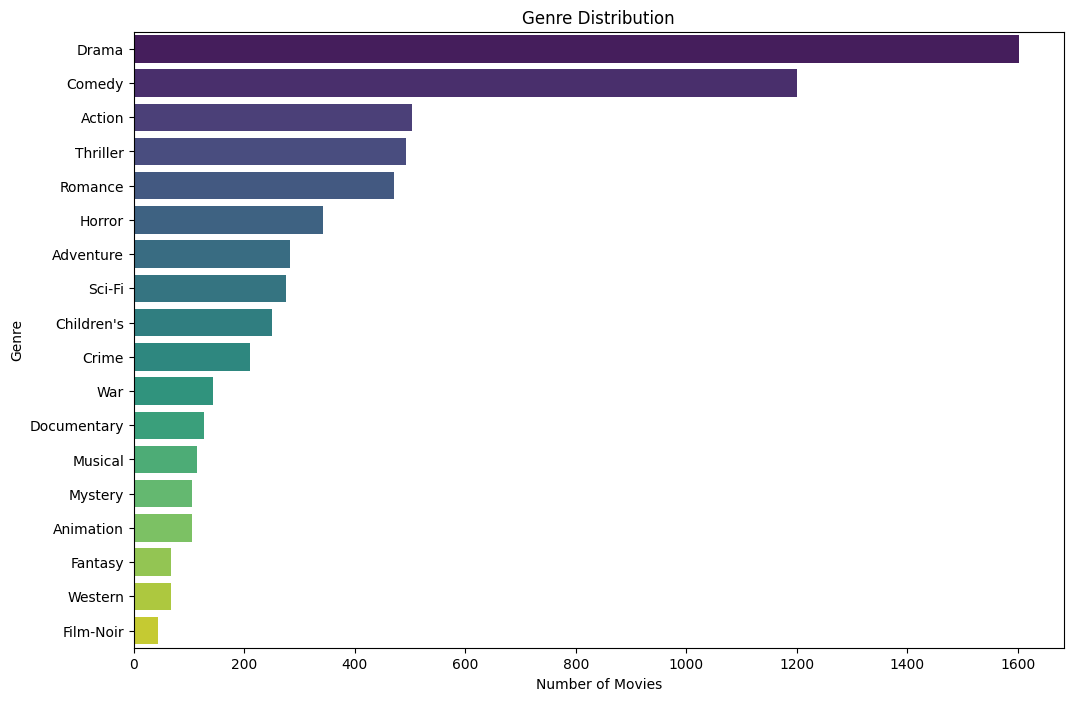

In [10]:
plt.figure(figsize=(12, 8))
sns.barplot(x=genre_counts.values, y=genre_counts.index, palette="viridis")
plt.title('Genre Distribution')
plt.xlabel('Number of Movies')
plt.ylabel('Genre')
plt.show()

### Movies per year 

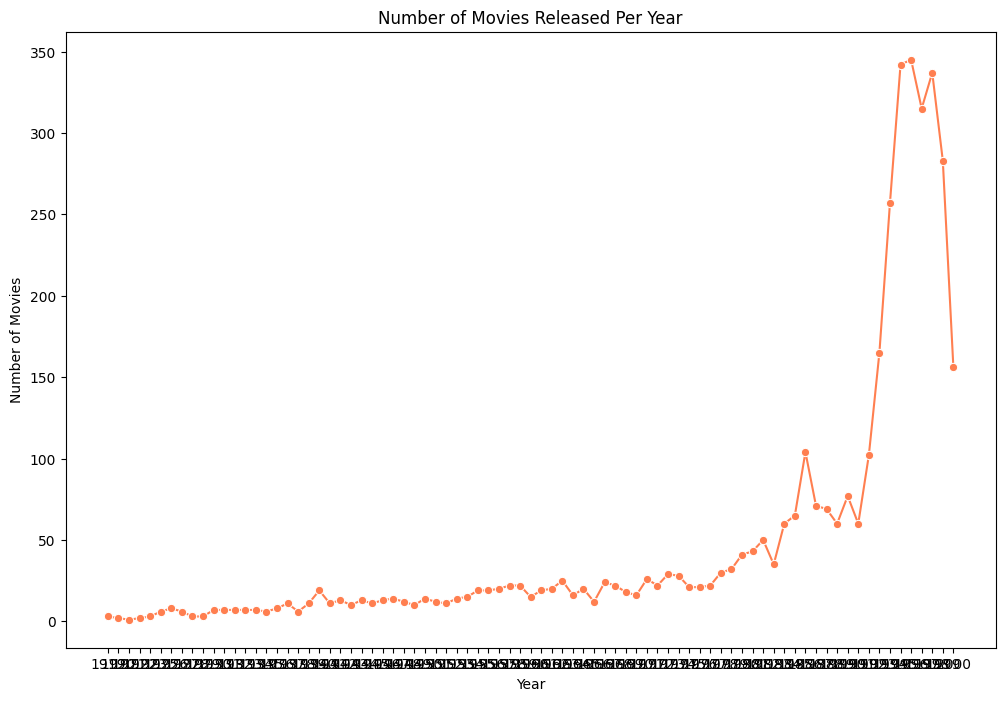

In [12]:
movies_per_year = df['Year'].value_counts().sort_index()
plt.figure(figsize=(12, 8))
sns.lineplot(x=movies_per_year.index, y=movies_per_year.values, marker="o", color='coral')
plt.title('Number of Movies Released Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.show()


### One Hot encoding of genres

In [13]:
genres_one_hot = df['Genres'].str.join('|').str.get_dummies()

In [14]:
genres_one_hot.head()

,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [16]:
df = pd.concat([df, genres_one_hot], axis=1)
df.head()


,MovieID,Title,Genres,Year,Action,Adventure,Animation,Children's,Comedy,Crime,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),"[Animation, Children's, Comedy]",1995,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),"[Adventure, Children's, Fantasy]",1995,0,1,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),"[Comedy, Romance]",1995,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale (1995),"[Comedy, Drama]",1995,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Father of the Bride Part II (1995),[Comedy],1995,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
